In [35]:
## import module
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

## Load Data
mamm_feature_clustered = pd.read_csv("../../../resources/processedData/매머드_feature_clustered.csv", index_col =False)
mamm_feature = pd.read_csv("../../../resources/processedData/매머드_feature_clustered2.csv", index_col =False)

In [40]:
mamm_feature

,매장코드_영업일자_시간대,주중/주말,시간대구분,상업지역 면적,평균생활인구수,생활인구당 평균매출_cl
0,S53661_20190201_1,0,1.0,203448.20,102461.88,1
1,S53661_20190201_2,0,2.0,203448.20,149401.14,1
2,S53661_20190201_3,0,3.0,203448.20,130305.51,1
3,S53661_20190207_1,0,1.0,203448.20,94200.97,2
4,S53661_20190207_2,0,2.0,203448.20,144196.27,1
...,...,...,...,...,...,...
1426,T64222_20190227_4,0,4.0,103356.25,93636.11,1
1427,T64222_20190228_1,0,1.0,103356.25,100872.60,2
1428,T64222_20190228_2,0,2.0,103356.25,146583.15,0
1429,T64222_20190228_3,0,3.0,103356.25,138484.15,2


In [37]:
## Prepare the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
mamm_feature_clustered = mamm_feature_clustered.astype(str)
mamm_feature_clustered

# 원핫인코딩
X = pd.get_dummies(mamm_feature_clustered.iloc[:,[1,2,4,5]])
y = mamm_feature["생활인구당 평균매출_cl"]

# split into train/test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [87]:
## Prepare the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

X = mamm_feature.iloc[:,[1,2,3,4]]
y = mamm_feature["생활인구당 평균매출_cl"]

# split into train/test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#X_train, X_test, y_train, y_test = StratifiedShuffleSplit(X, y, test_size=0.35, random_state=0)

# Standardized data
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [47]:
X_train_std

array([[-0.52919859, -0.31749109, -0.18870289, -0.57694956],
       [-0.52919859, -1.26054324, -0.2009724 , -0.8930696 ],
       [-0.52919859, -1.26054324, -0.013791  , -0.811657  ],
       ...,
       [-0.52919859, -1.26054324, -1.05616846, -0.97575063],
       [-0.52919859, -1.26054324, -0.4727601 , -0.64351784],
       [-0.52919859,  0.62556107, -0.013791  , -0.32837912]])

In [42]:
import matplotlib.pyplot as plt
from numpy import average
import seaborn as sns
import pandas as pd

# 모델 평가를 위한 metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix, plot_roc_curve

def model_execution(model, algorithm_name, x_train, y_train, x_test, y_test):

    # 모델 학습
    model.fit(X_train_std, y_train)
    
    # 최종 모델의 성능 평가
    train_acc = model.score(X_train_std, y_train)
    y_pred = model.predict(X_test_std)
    print(f"Train Accuracy: {train_acc:.3f}")
    print(f"Test Accuracy: {accuracy_score(y_test, y_pred, average='micro'):.3f}") # 정확도
    print(f"Precision: {precision_score(y_test, y_pred, average='micro'):.3f}") # 정밀도
    print(f"Recall: {recall_score(y_test, y_pred, average='micro'):.3f}") # 재현율
    print(f"F1-score: {f1_score(y_test, y_pred, average='micro'):.3f}") # F1 스코어
    
    # 혼동행렬 시각화
    plt.figure(figsize =(30, 30))
    plot_confusion_matrix(model, 
                         x_test, y_test,
                         include_values = True,
                         display_labels = y_label_name, # 목표변수 이름
                         average='micro',
                         cmap = 'Pastel1') # 컬러맵
    #plt.savefig('../figure/' + algorithm_name + '_confusion_matrix.png') # 혼동행렬 자료 저장
    plt.show()
    
    plot_roc_curve(model, X_test, y_test)
    plt.show() 

In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)
print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test_std, y_test)))

테스트 세트의 정확도: 0.81


0.7418604651162791
0.6977314674989094 0.6967028443924524


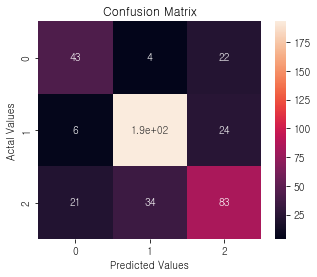

In [49]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
mamm_tree = DecisionTreeClassifier(criterion='entropy')
mamm_tree.fit(X_train_std, y_train)
y_pred = mamm_tree.predict(X_test_std)
precision = precision_score(y_test, y_pred,average= "macro")
recall = recall_score(y_test, y_pred,average= "macro")
print(accuracy_score(y_test, y_pred))
print(precision, recall)


#plot_tree(mamm_tree)

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     columns = ['0','1','2'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


In [50]:
## Decision Tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
mamm_rf = RandomForestClassifier()
mamm_rf.fit(X_train_std, y_train)
y_pred = mamm_rf.predict(X_test_std)
precision = precision_score(y_test, y_pred,average= "macro")
recall = recall_score(y_test, y_pred,average= "macro")
print(accuracy_score(y_test, y_pred))
print(precision, recall)

0.7604651162790698
0.722710251209237 0.7180953618855744


In [ ]:
## XGBOOST 


In [88]:
from sklearn import svm
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
rbf = svm.SVC(kernel='rbf', gamma=6, C=5).fit(X_train_std, y_train)
poly = svm.SVC(kernel='poly', degree=13, C=13.6).fit(X_train_std, y_train)

poly_pred = poly.predict(X_test_std)
rbf_pred = rbf.predict(X_test_std)

poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (Polynomial Kernel):  63.02
F1 (Polynomial Kernel):  61.67
Accuracy (RBF Kernel):  81.63
F1 (RBF Kernel):  81.27


In [ ]:
import xgboost as xgb
